<a href="https://colab.research.google.com/github/anhhaibkhn/LeetCode_Daily_Challenges/blob/master/Leetcode_2021_MayJune.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

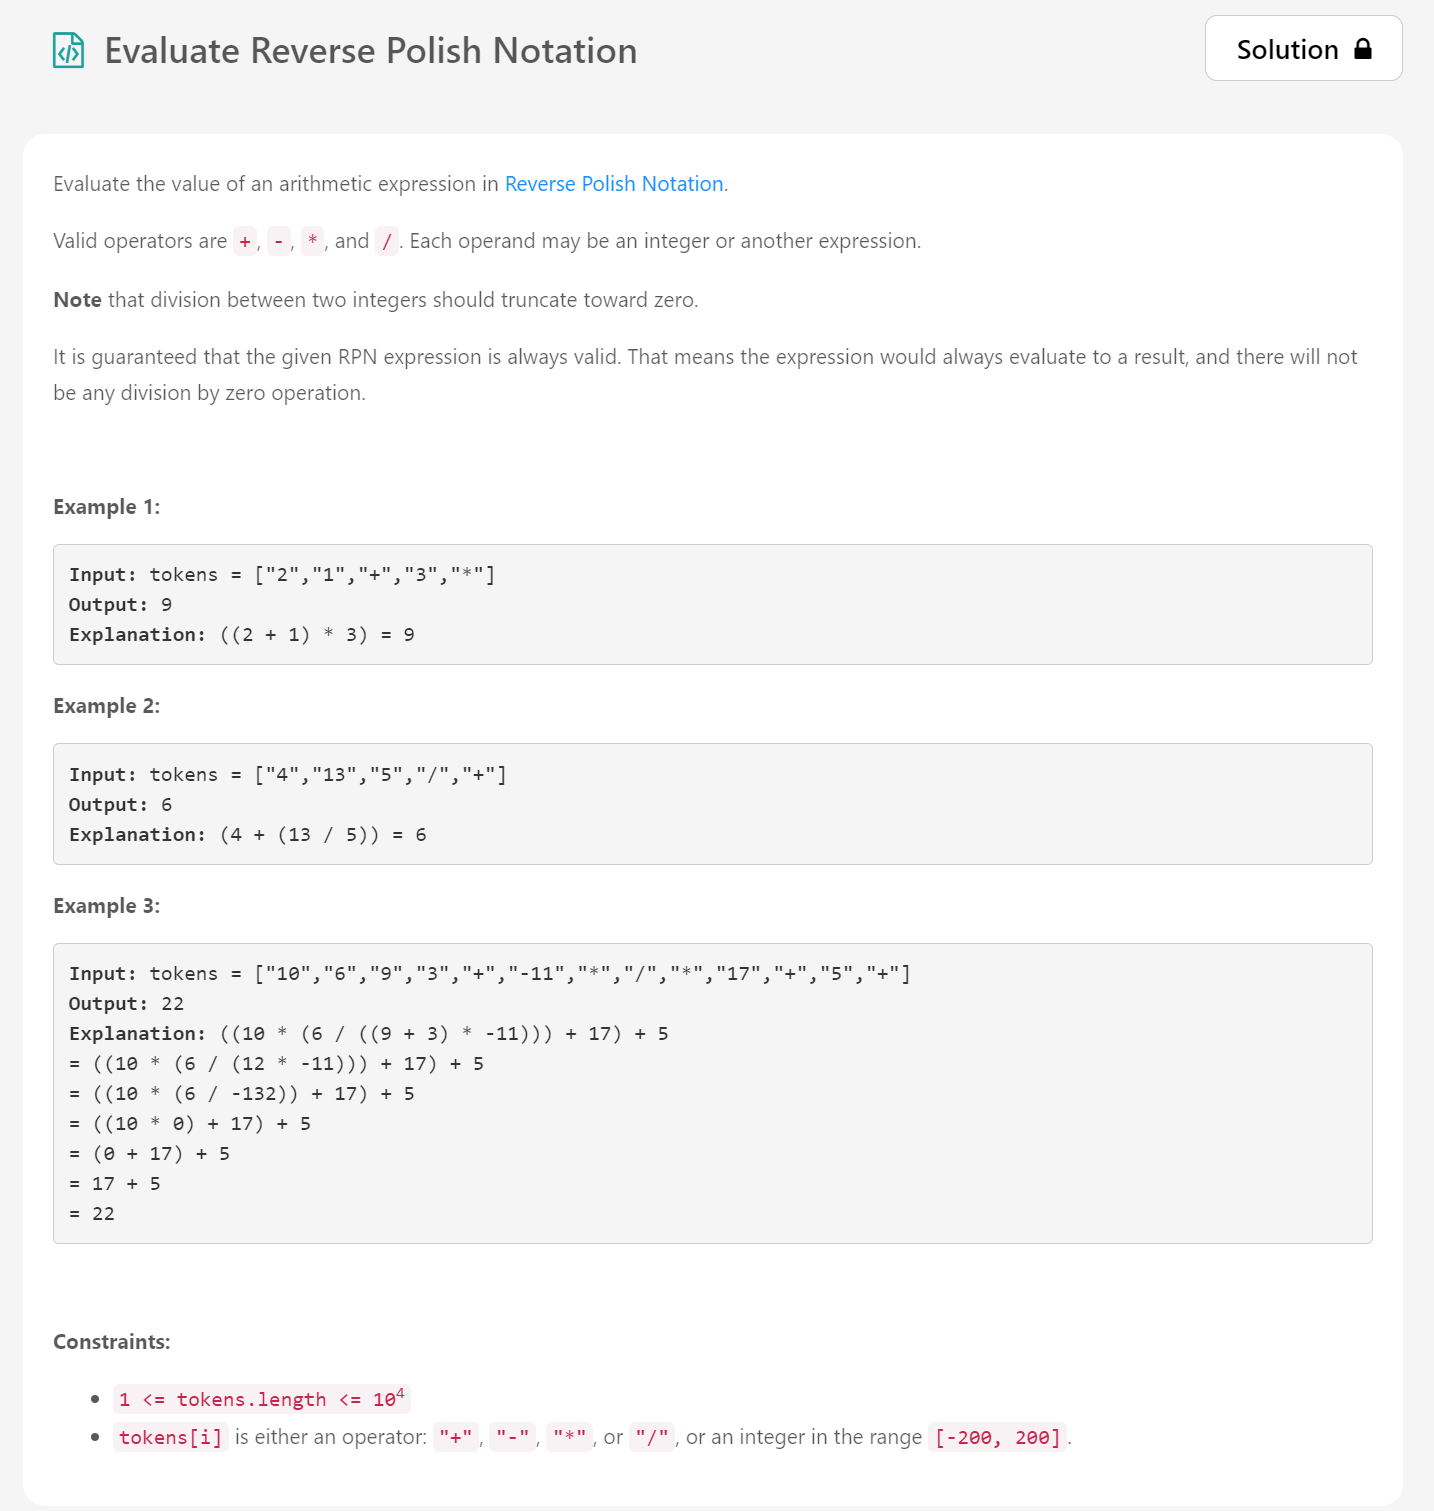

In [ ]:
# Using stack
class Solution:
    def evalRPN(self, tokens: List[str]) -> int:
        stk = []
        for token in tokens:
            # token is operand
            if token in "+-*/":
                y = stk.pop()
                x = stk.pop()
                if token == "+":
                    stk.append(x + y)
                elif token == "-":
                    stk.append(x - y)
                elif token == "*":
                    stk.append(x * y)
                elif token == "/":
                    stk.append(int(x/y))
            else:
                # token is number
                stk.append(int(token))


        return stk.pop()
        

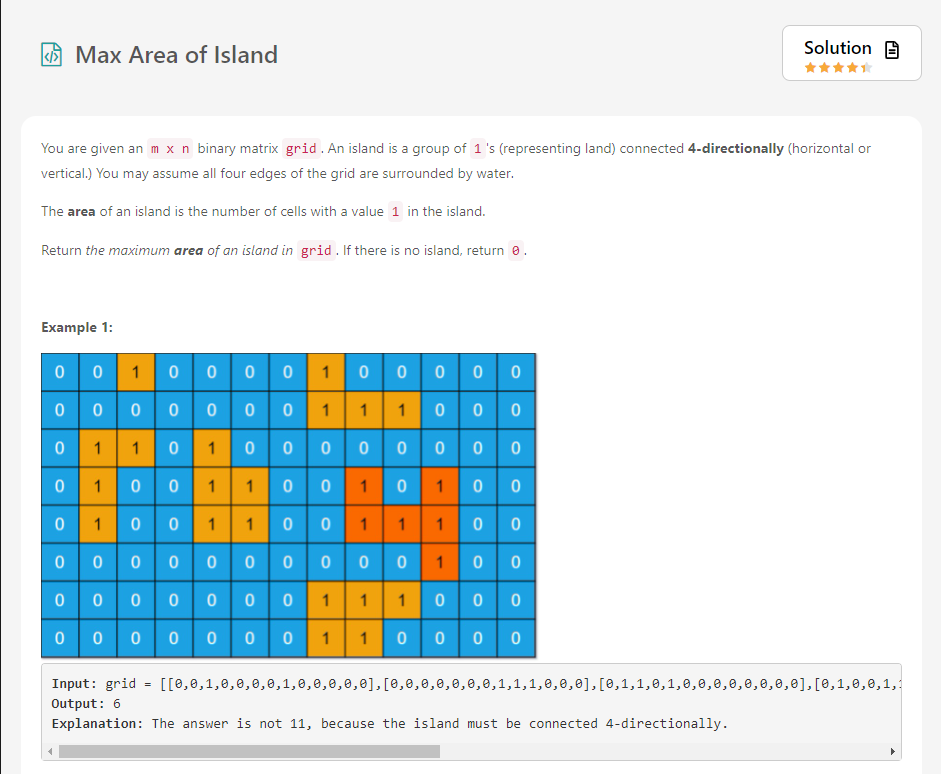

In [ ]:
# Input: grid = [[0,0,0,0,0,0,0,0]]
# Output: 0
 

# Constraints:

# m == grid.length
# n == grid[i].length
# 1 <= m, n <= 50
# grid[i][j] is either 0 or 1.



class Solution:
    def maxAreaOfIsland(self, grid: List[List[int]]) -> int:
        rows, cols = len(grid), len(grid[0])
        neighbours = [(1,0), (-1,0), (0,1), (0,-1)]
        max_area = 0
        
        def depth_first_search(r, c):
            # put the checked cell to zero
            grid[r][c] = 0
            cur_area = 1
            
            for dr, dc in neighbours:
                # check boundary and if the neighbour cell = 1
                if 0 <= r + dr < rows and 0 <= c + dc <cols and grid[r+dr][c+dc] == 1:
                    cur_area  += depth_first_search(r+dr, c+dc)
            return cur_area
        
        for r in range(rows):
            for c in range(cols):
                if grid[r][c] == 1:
                    max_area = max(max_area, depth_first_search(r,c))
                    
        return max_area

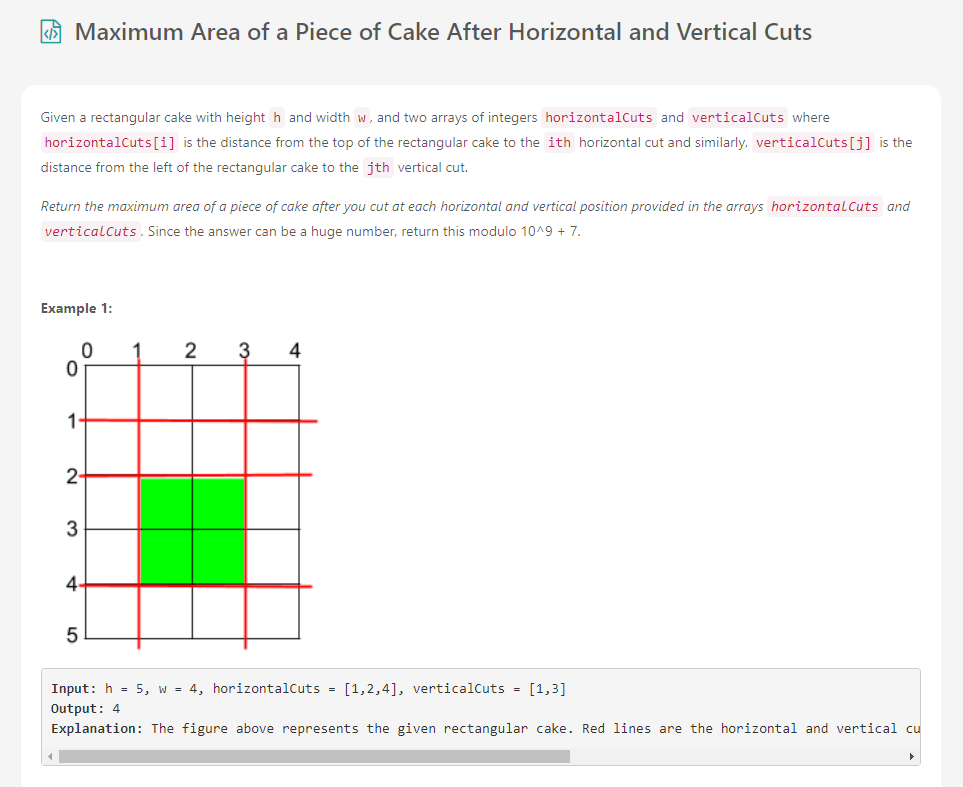

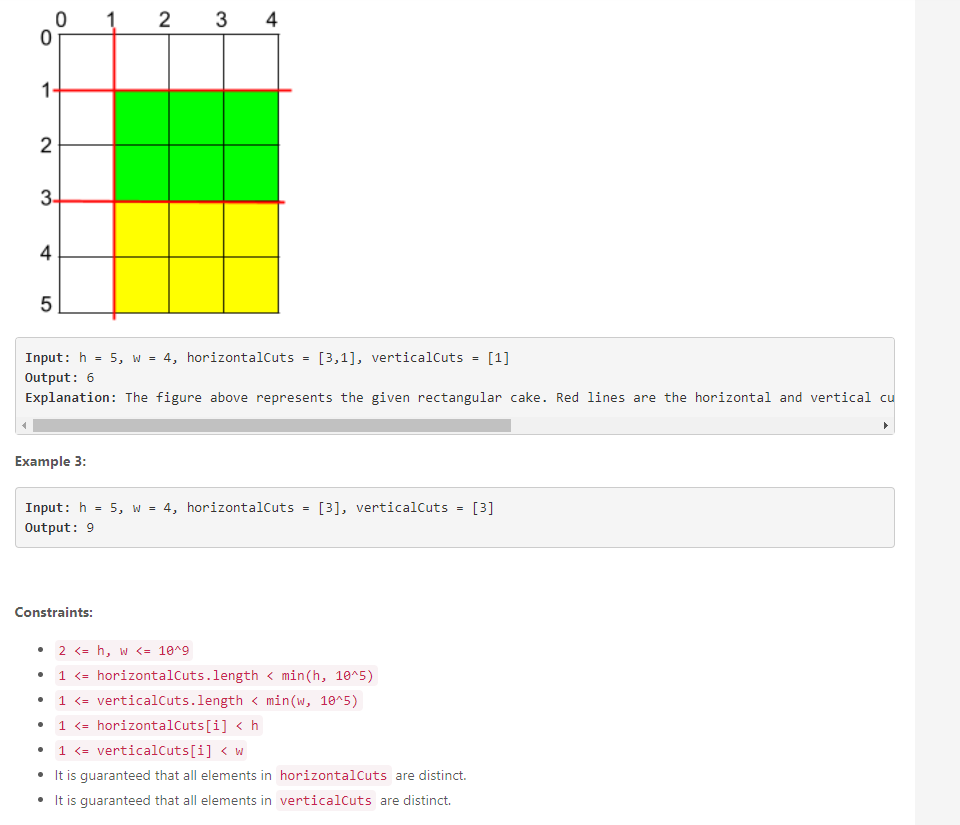

In [ ]:
# My solution: Time limit exceeded (Brute Force)
class Solution:
    def maxArea(self, h: int, w: int, horizontalCuts: List[int], verticalCuts: List[int]) -> int:
        horizontalCuts.sort()
        verticalCuts.sort()
        
        horizontalCuts = [0] + horizontalCuts + [h]
        verticalCuts = [0] + verticalCuts + [w]
        max_area = 0
        # possible y
        for y1, y2 in zip(verticalCuts, verticalCuts[1:]):
            for x1, x2 in zip(horizontalCuts, horizontalCuts[1:]):
                max_area = max(abs(y2 - y1)*abs(x2 - x1), max_area)
        return max_area

# faster but failed the test case 1000000 
class Solution:
    def maxArea(self, h: int, w: int, horizontalCuts: List[int], verticalCuts: List[int]) -> int:        
        horizontalCuts = sorted([0] + horizontalCuts + [h])
        verticalCuts = sorted([0] + verticalCuts + [w])
        max_y, max_x = 0,0

        for y1, y2 in zip(verticalCuts, verticalCuts[1:]):
            max_y = max(abs(y2-y1), max_y)
            
        for x1, x2 in zip(horizontalCuts, horizontalCuts[1:]):
            max_x = max(abs(x2-x1), max_x)

        return max_x*max_y

# Fix by change the return to max_x*max_y % (10**9 + 7)
class Solution:
    def maxArea(self, h: int, w: int, horizontalCuts: List[int], verticalCuts: List[int]) -> int:        
        horizontalStrips = [0] + sorted(horizontalCuts) + [h]
        verticalStrips = [0] + sorted(verticalCuts) + [w]
        max_y, max_x = 0,0

        for x in range(len(horizontalStrips) - 1):
            max_x = max(horizontalStrips[x+1]-horizontalStrips[x], max_x)
            
        for y in range(len(verticalStrips) - 1):
            max_y = max(verticalStrips[y+1]-verticalStrips[y], max_y)

        return max_x*max_y % (10**9 + 7)

        


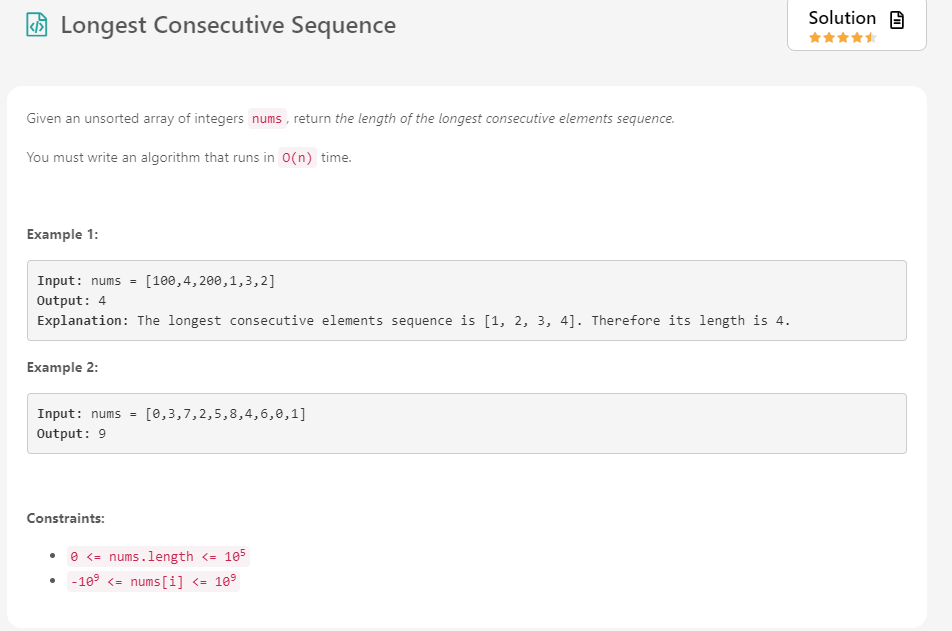

In [ ]:
# my solution quite slow

class Solution:
    def longestConsecutive(self, nums: List[int]) -> int:
        if nums:
            nums = sorted(list(set(nums)))
            max_len, i = 1, 1
            while i < len(nums):
                tmp = 1  
                while i < len(nums) and nums[i] == nums[i-1] + 1 :
                    tmp +=1 
                    i +=1
                    continue
                max_len = max(tmp,max_len)
                i += 1
            return max_len
        else:
            return 0


# Stephen's solution 

""" If the number x is the start of a streak (i.e., x-1 is not in the set), then test y = x+1, x+2, x+3, ... and stop at the first number y not in the set.
  The length of the streak is then simply y-x and we update our global best with that. 
  Since we check each streak only once, this is overall O(n). 
  This ran in 44 ms on the OJ, one of the fastest Python submissions."""

def longestConsecutive(self, nums):
    nums = set(nums)
    best = 0
    for x in nums:
        if x - 1 not in nums:
            y = x + 1
            while y in nums:
                y += 1
            best = max(best, y - x)
    return best

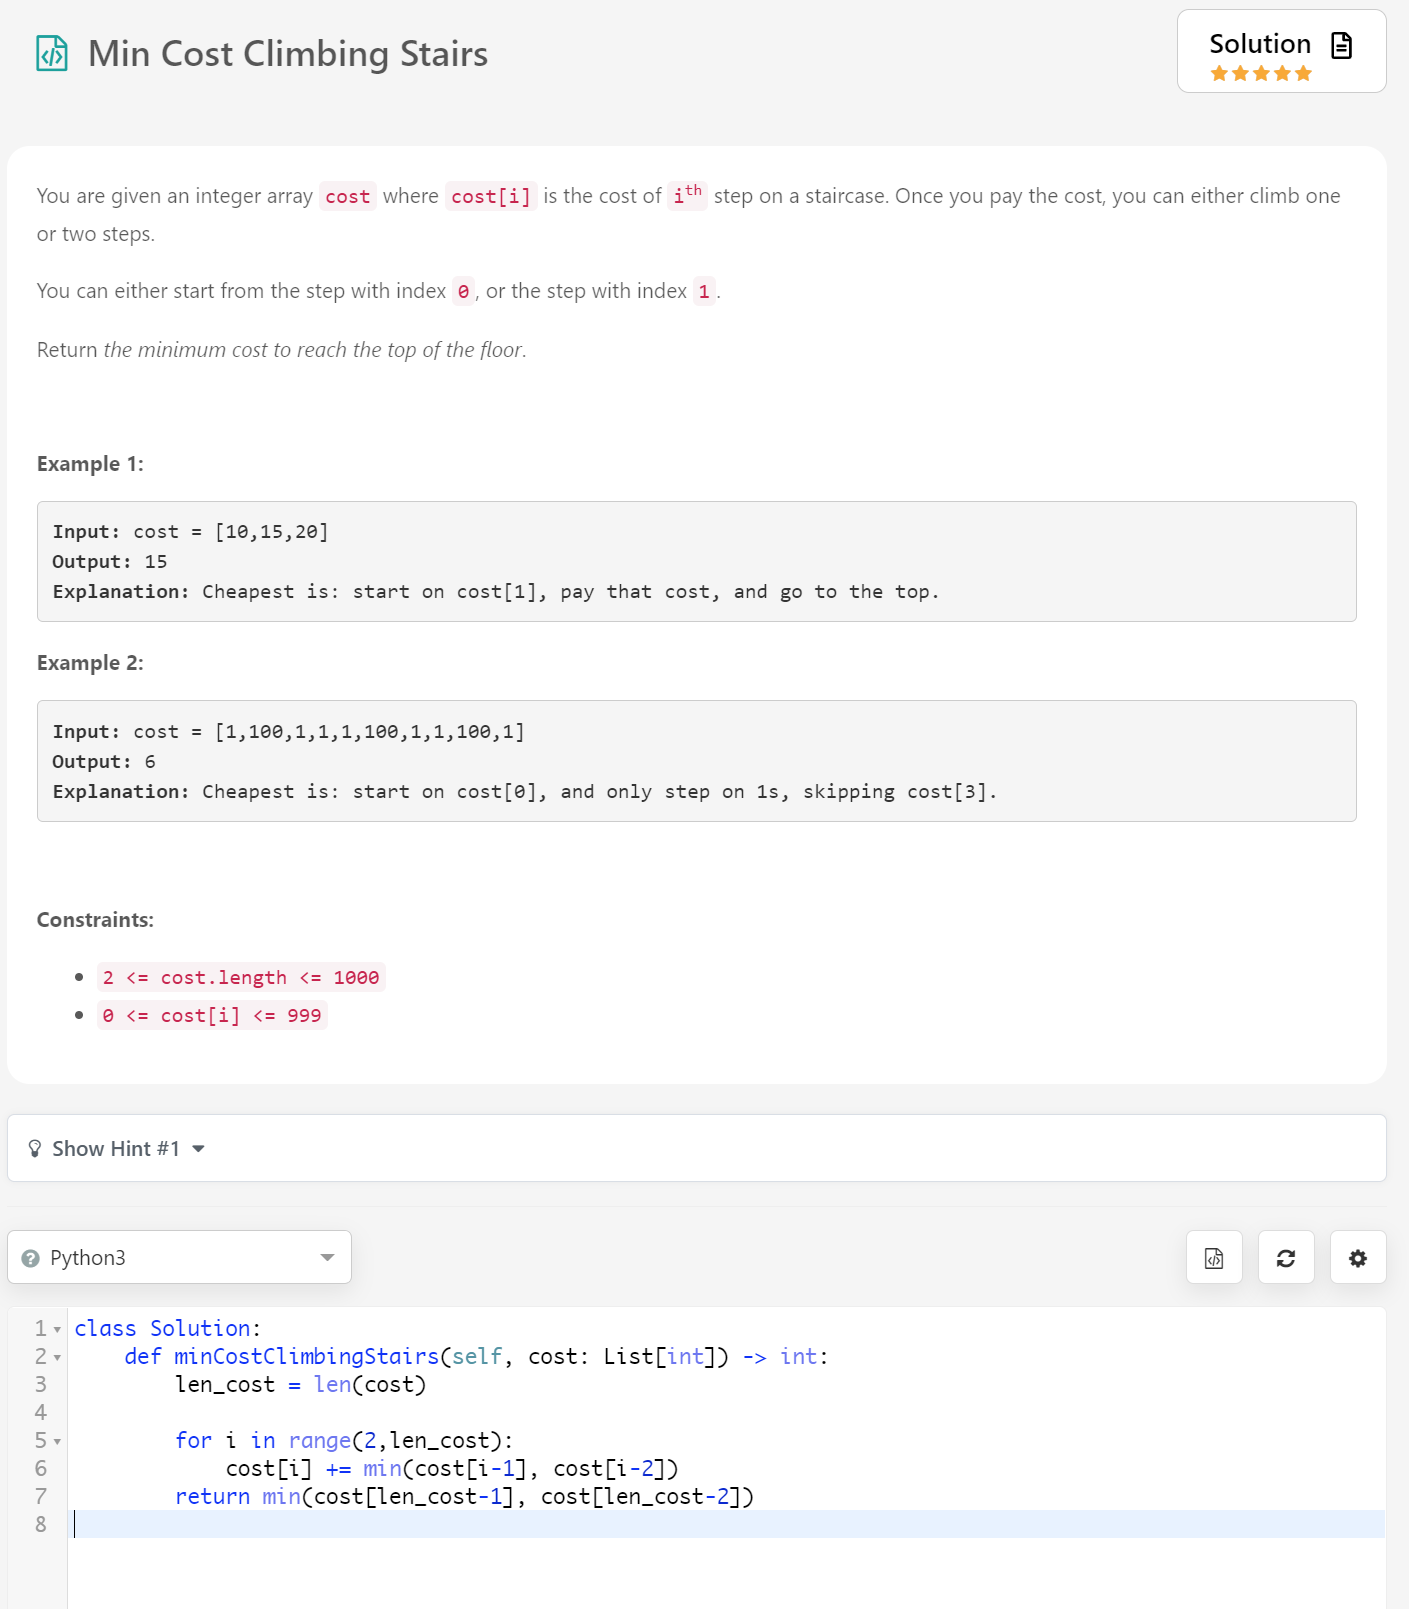

In [ ]:
# modify the list
from typing import List
class Solution:
    def minCostClimbingStairs(self, cost: List):
        len_cost = len(cost)

        for i in range(2,len_cost):
            cost[i] += min(cost[i-1], cost[i-2])
            print(cost)

        return min(cost[len_cost-1], cost[len_cost-2])


# not modify list
class Solution2:
    def minCostClimbingStairs(self, cost: List):
        if(len(cost) == 2):
            return min(cost[0], cost[1])        
        
        a = cost[0]
        b = cost[1]
        
        for ind in range(2, len(cost)):
            a, b = b, min(a,b) + cost[ind] 
            print(a, b)
            
        return min(a,b)

# fastest using Dynamic Programming
class Solution3:
    def minCostClimbingStairs(self, cost: List):
        f1 = f2 = 0
        for x in reversed(cost):
            f1, f2 = x + min(f1, f2), f1
        return min(f1, f2)

# try the test case
"""
Input: cost = [10,15,20]
Output: 15
Explanation: Cheapest is: start on cost[1], pay that cost, and go to the top.

Input: cost = [1,100,1,1,1,100,1,1,100,1]
Output: 6
Explanation: Cheapest is: start on cost[0], and only step on 1s, skipping cost[3].
"""
cost = [1,100,1,1,1,100,1,1,100,1]

sol2 = Solution2()

print(sol2.minCostClimbingStairs(cost))

100 2
2 3
3 3
3 103
103 4
4 5
5 104
104 6
6


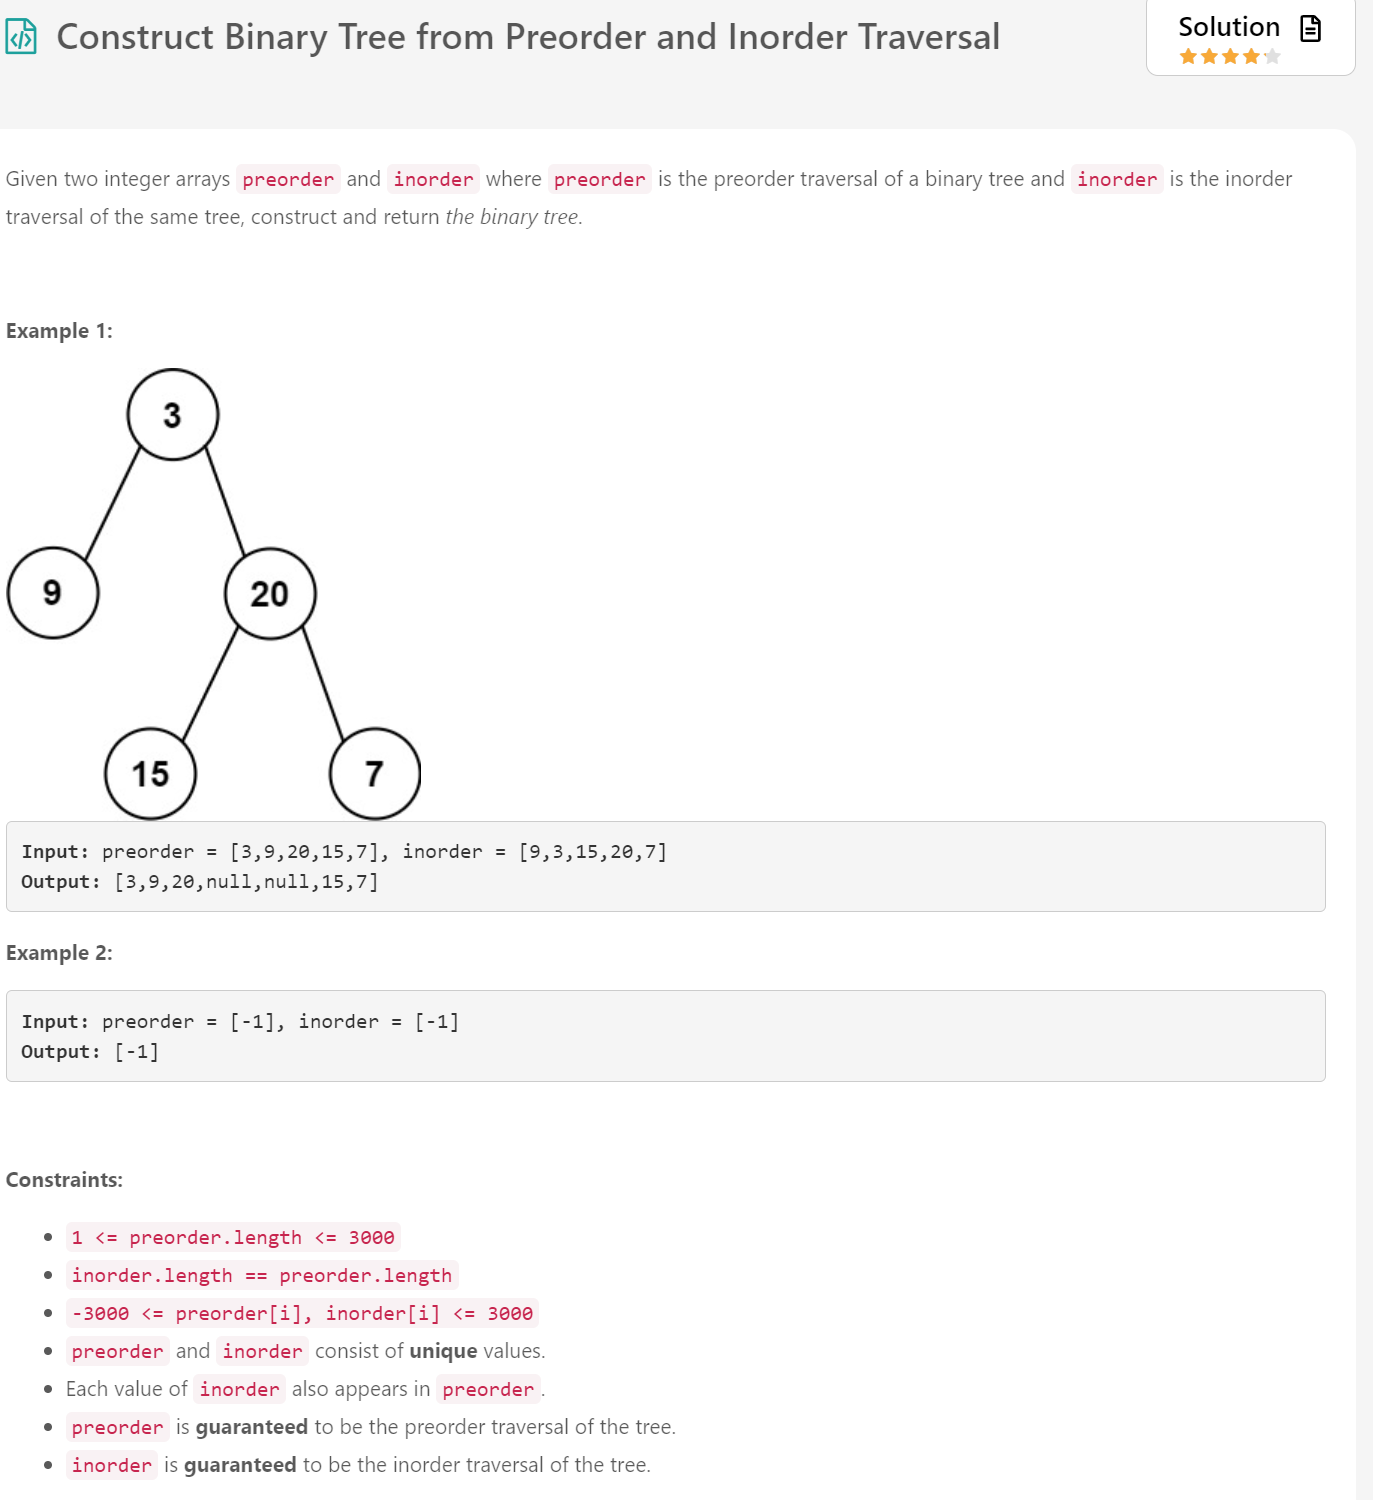

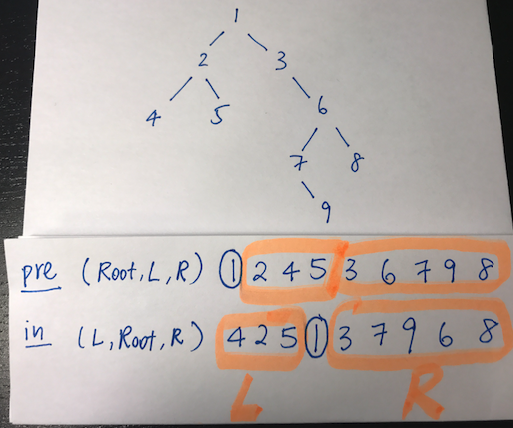

In [ ]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
# short code approach
pre_order = [1,2,4,5,3,6,7,9,8]
in_order = [4,2,5,1,3,7,9,6,8]

def buildTree(preorder, inorder):
    if inorder:
        ind = inorder.index(preorder.pop(0))
        root = TreeNode(inorder[ind])
        print(preorder)
        root.left = buildTree(preorder, inorder[0:ind])
        print("here")
        root.right =buildTree(preorder, inorder[ind+1:])
        return root

buildTree(pre_order, in_order)

[2, 4, 5, 3, 6, 7, 9, 8]
[4, 5, 3, 6, 7, 9, 8]
[5, 3, 6, 7, 9, 8]
here
here
[3, 6, 7, 9, 8]
here
here
[6, 7, 9, 8]
here
[7, 9, 8]
[9, 8]
here
[8]
here
here
[]
here
